In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
titanic_data=pd.read_csv("titanic_data.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
titanic_data=titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
titanic_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,male,22.0,1,0,S,7.2500
1,1,1,female,38.0,1,0,C,71.2833
2,1,3,female,26.0,0,0,S,7.9250


In [78]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

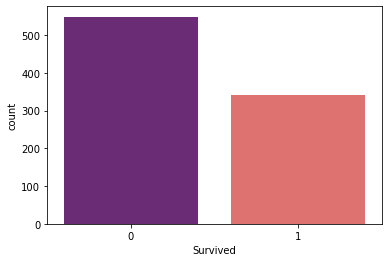

In [79]:
sns.countplot(x='Survived',data=titanic_data,palette='magma')

In [80]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Fare          0
dtype: int64

In [81]:
titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Fare        0
dtype: int64

In [82]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [83]:
titanic_data_X=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
titanic_data_Y=titanic_data[['Survived']]

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(titanic_data_X,titanic_data_Y,test_size=0.2,random_state=0)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

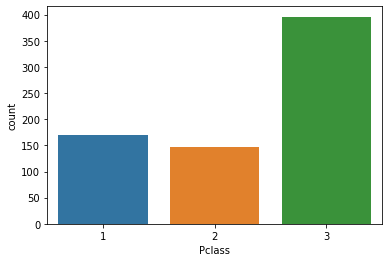

In [85]:
sns.countplot(x='Pclass',data=X_train)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

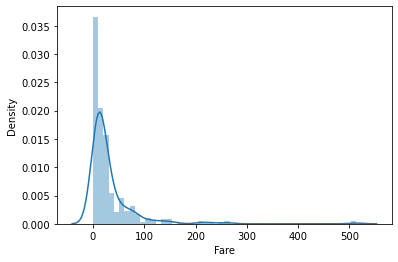

In [86]:
sns.distplot(X_train['Fare'])

In [87]:
X_train[['Age']].describe()

,Age
count,712.000000
mean,29.736061
std,13.089471
min,0.670000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [88]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#we perform Z_score normilization on both these feature
age_scalar=StandardScaler()
age_scalar.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [89]:
X_train[['Age']]=age_scalar.transform(X_train[['Age']])

<AxesSubplot:xlabel='Age', ylabel='Density'>

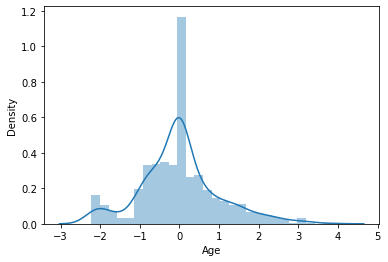

In [90]:
sns.distplot(X_train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

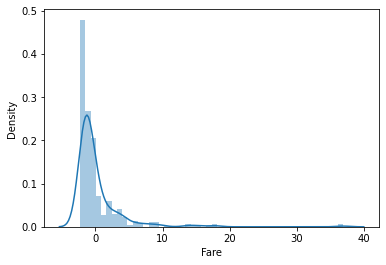

In [91]:
fare_scalar=StandardScaler()
fare_scalar.fit(pd.DataFrame(X_train['Fare']))
X_train[['Fare']]=age_scaler.transform(X_train[['Fare']])

sns.distplot(X_train['Fare'])

In [92]:
X_train['Sex']=X_train["Sex"].map({'female':0,'male':1})

In [93]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
140,3,0,-0.002824,0,2,C,-1.107795
439,2,1,0.096629,0,0,S,-1.470616
817,2,1,0.096629,1,1,C,0.555656
378,3,1,-0.744332,0,0,C,-1.966592
491,3,1,-0.667881,0,0,S,-1.719082


In [94]:
embarked_encoder=LabelEncoder()
embarked_encoder.fit(pd.DataFrame(X_train[['Embarked']]))
X_train['Embarked']=embarked_encoder.transform(X_train[['Embarked']])

<AxesSubplot:>

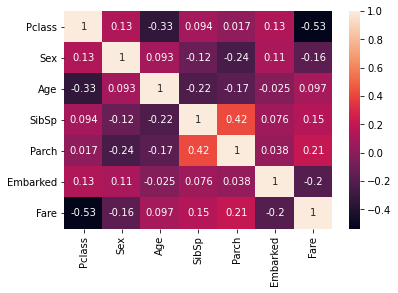

In [95]:
sns.heatmap(X_train.corr(),annot=True)

In [96]:
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
140,3,0,-0.002824,0,2,0,-1.107795
439,2,1,0.096629,0,0,2,-1.470616
817,2,1,0.096629,1,1,0,0.555656


In [97]:
del X_train['Pclass']

In [98]:
X_train

,Sex,Age,SibSp,Parch,Embarked,Fare
140,0,-0.002824,0,2,0,-1.107795
439,1,0.096629,0,0,2,-1.470616
817,1,0.096629,1,1,0,0.555656
378,1,-0.744332,0,0,0,-1.966592
491,1,-0.667881,0,0,2,-1.719082
...,...,...,...,...,...,...
835,0,0.708237,1,1,0,4.084183
192,0,-0.820782,1,0,2,-1.672890
629,1,-0.002824,0,0,1,-1.682133
559,0,0.478884,1,0,2,-0.943104


In [99]:
X_train_original=X_train
X_train=X_train.values
Y_train=Y_train.values

In [100]:
logistic_regression=LogisticRegression()

In [101]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [102]:
coefficients=pd.concat([pd.DataFrame(X_train_original.columns),pd.DataFrame(np.transpose(logistic_regression.coef_))],axis=1)
coefficients.columns=['Feature','Coefficients']
coefficients

,Feature,Coefficients
0,Sex,-2.506139
1,Age,-0.313722
2,SibSp,-0.414107
3,Parch,-0.157709
4,Embarked,-0.146071
5,Fare,0.171399


In [105]:
def transform_test_data(test_data,age_scalar,fare_scalar,embarked_encoder):
    test_data['Sex']=test_data['Sex'].map({'female':0,'male':1})
    test_data['Age']=age_scalar.transform(test_data[['Age']])
    test_data['Fare']=fare_scalar.transform(test_data[['Fare']])
    test_data['Embarked']=embarked_encoder.transform(test_data[['Embarked']])
    del test_data['Pclass']
    return test_data

In [106]:
X_test=transform_test_data(X_test,age_scalar,fare_scalar,embarked_encoder)

In [107]:
X_test=X_test.values
Y_test=Y_test.values

In [108]:
y_pred=logistic_regression.predict(X_test)

In [109]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score
confusion_matrix(Y_test,y_pred)

array([[93, 17],
       [22, 47]], dtype=int64)

In [111]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.73      0.68      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [112]:
print(accuracy_score(Y_test,y_pred))


0.7821229050279329


In [118]:
import scikitplot

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

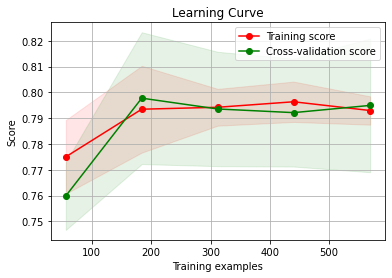

In [119]:
scikitplot.estimators.plot_learning_curve(logistic_regression,X_train,Y_train)

In [126]:
Y_pred_prob=logistic_regression.predict_proba(X_test)

In [128]:
model_result={}

0.8121212121212121


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

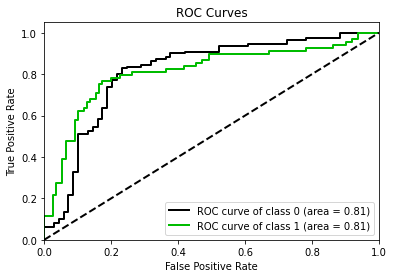

In [129]:
#roc curve
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))
model_result['Logistic Regression(12)']=roc_auc_score(Y_test,class_1_prob)
scikitplot.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

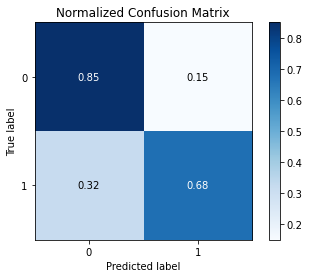

In [131]:
scikitplot.metrics.plot_confusion_matrix(Y_test,y_pred,normalize=True)